# CENG 471 Introduction to Image Processing
## Assignment #1 


# Import  libraries 

In [55]:
import numpy as np
import skimage as sk
import skimage.io as skio
from matplotlib import pyplot as plt
import cv2

# Functions to use

In [56]:

#For a better matching score, I cropped image borders 
def crop(image, perc=0.1):
    
    height, width = image.shape
    a, b = perc, 1-perc
    new_image = image[int(a * height):int(b * height), int(a * width):int(b * width)]
    return new_image

#Normalized Cross-Correlation(NCC): image1./||image1|| and  image2./||image2||
def ncc(A, B):
    
    return np.sum((A/np.linalg.norm(A)) * (B/np.linalg.norm(B)))

#Find displacement vector
def align(img1, img2):
    
    best_score = -99999999999
    #bound [-15,15] pixels
    for column in range(-15,15):
        for row in range(-15,15):  
            #Roll the image vertically
            moved_vertical = np.roll(img2,column,0)
            moved = np.roll(moved_vertical,row,1)
            #Find displacement score using ncc algorithm
            img_displacement_score = ncc(img1, moved)
            if (img_displacement_score > best_score): 
                best_score = img_displacement_score
                img_displacement = [column, row]
                
    return img_displacement 

# Load input image 

In [155]:
im = skio.imread(r'images\00163v.jpg')
im = sk.img_as_float(im) 

# Compute the height and weight and separate colors

In [156]:
height = len(im)
width = len(im[0])
height_crop = int(height/3)

#Images are BGR ,therefore I seperate blue color channel firstly.
b = im[0:height_crop]                # blue
g = im[height_crop:height_crop*2]    # green
r = im[height_crop*2:height-1]       # red

# Cropped border each image and show each image

FIRST GRAY IMAGE(BLUE)


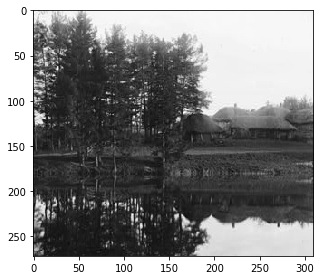

SECOND GRAY IMAGE(GREEN)


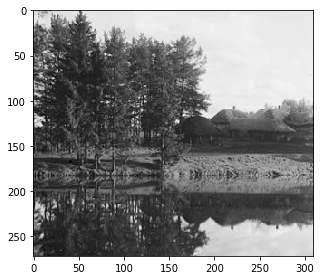

THIRD GRAY IMAGE(RED)


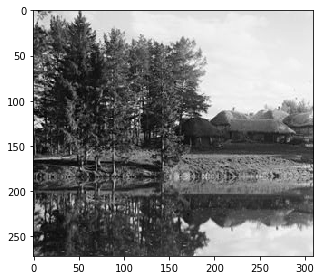

In [157]:
cropped_b=crop(b)
cropped_g=crop(g)
cropped_r=crop(r)

#show each image
print("FIRST GRAY IMAGE(BLUE)")
skio.imshow(cropped_b)
skio.show()

print("SECOND GRAY IMAGE(GREEN)")
skio.imshow(cropped_g)
skio.show()

print("THIRD GRAY IMAGE(RED)")
skio.imshow(cropped_r)
skio.show()


# Cropped images color with color channel

FIRST COLOR IMAGE(BLUE)


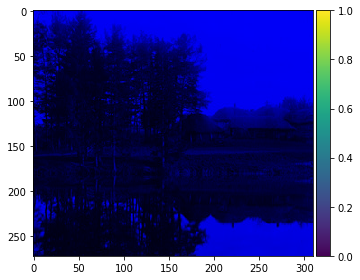

SECOND COLOR IMAGE(GREEN)


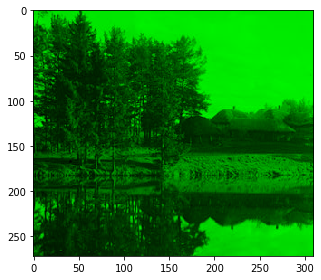

THIRD COLOR IMAGE(RED)


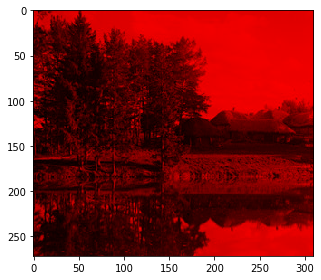

In [158]:
#Zero matrix for each color
zeros_blue = np.zeros(cropped_b.shape[:2], dtype = 'uint8')
zeros_green = np.zeros(cropped_g.shape[:2], dtype = 'uint8')
zeros_red = np.zeros(cropped_r.shape[:2], dtype = 'uint8')
    
#cropped blue color with color channel
print("FIRST COLOR IMAGE(BLUE)")
im_blue= np.dstack([zeros_red,zeros_green, cropped_b])
skio.imshow(im_blue)
skio.show()
    
#cropped green color with color channel
print("SECOND COLOR IMAGE(GREEN)")
im_green= np.dstack([zeros_red, cropped_g,zeros_blue])
skio.imshow(im_green)
skio.show()
    
#cropped red color with color channel
print("THIRD COLOR IMAGE(RED)")
im_red= np.dstack([cropped_r, zeros_green,zeros_blue])
skio.imshow(im_red)
skio.show()

# Find displacement and align red and green color

In [159]:
displacement_green = align(cropped_b, cropped_g)
aligned_green = np.roll(np.roll(cropped_g, displacement_green[0], axis = 0), displacement_green[1], axis = 1)

displacement_red = align(b, r)
aligned_red = np.roll(np.roll(cropped_r, displacement_red[0], axis = 0), displacement_red[1], axis = 1)

print("Displacement Green: ",displacement_green)
print("Displacement Red: ",displacement_red)

Displacement Green:  [-2, 1]
Displacement Red:  [3, -2]


# Show blue image with aligned red image

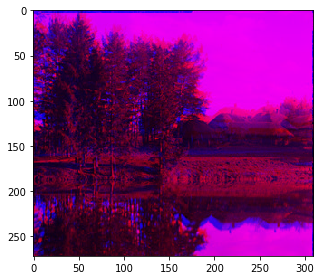

In [160]:
im_br= np.dstack([aligned_red,zeros_green, cropped_b])
skio.imshow(im_br)
skio.show()

# Show blue image with aligned green image

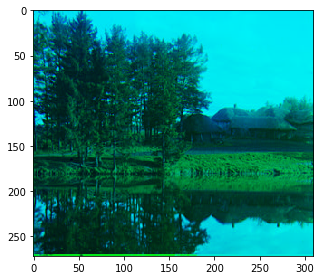

In [161]:
im_bg= np.dstack([zeros_red,aligned_green, cropped_b])
skio.imshow(im_bg)
skio.show()

# Create a color image

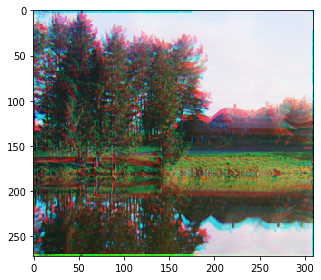

In [162]:
im_out = np.dstack([aligned_red, aligned_green, cropped_b])
skio.imshow(im_out)
skio.show()